In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Set locations

In [2]:
DATA_LOCATION = '../data/'
TEST_IMAGES_LOCATION = '../data/test_images/'
TRAIN_IMAGES_LOCATION = '../data/train_images/'

# Import data

### Label mapping

In [3]:
label_map = pd.read_csv(DATA_LOCATION + 'label_map.txt', sep=' ', names=['class_name','class_nr'])

In [4]:
label_map.sample(n=10)

,class_name,class_nr
49,diatom_chain_tube,49
92,hydromedusae_shapeB,92
89,echinoderm_larva_pluteus_urchin,89
33,siphonophore_physonect_young,33
0,unknown_unclassified,0
112,shrimp_zoea,112
81,detritus_blob,81
41,hydromedusae_haliscera_small_sideview,41
95,hydromedusae_other,95
111,copepod_calanoid_eggs,111


### Sample data

In [5]:
sample = pd.read_csv(DATA_LOCATION + 'sample.csv', names=['image','class_nr'], header=0)

In [6]:
sample.sample(n=10)

,image,class_nr
4400,62273.jpg,0
5005,9258.jpg,0
2337,8256.jpg,0
2352,111628.jpg,0
1094,131405.jpg,0
678,87494.jpg,0
4186,64149.jpg,0
2819,71786.jpg,0
1871,118074.jpg,0
3652,83068.jpg,0


### Train data

In [7]:
train_labels = pd.read_csv(DATA_LOCATION + 'train_onelabel.csv')

In [8]:
train_labels.sample(n=10)

,image,class
1065,98280.jpg,3
10655,35331.jpg,49
9131,29150.jpg,42
2745,22073.jpg,11
13783,54489.jpg,61
13231,125634.jpg,58
12364,145067.jpg,58
3208,21960.jpg,12
14493,16634.jpg,67
17849,48310.jpg,84


## The actual images

Show a random image from the training set

In [9]:
def get_image(filepath):
    """
    Load image from filepath to a numpy.ndarray
    input:
        - filepath: string with relative or absolute path to image
    output:
        - img:
            numpy.ndarray containing the image
            shaped (M,N), values [0.0, 1.0]
    """
    try:
        img = TRAIN_IMAGES_LOCATION + filepath
        img = mpimg.imread(img)
    except:
        img = filepath
        img = mpimg.imread(img)
    img = np.absolute(np.divide(img.astype(float), 255) - 1.0)
    return img

def show_image(filepath):
    """
    Show the image through Matplotlib
    input:
        - filepath: string with relative or absolute path to image
    output:
        - None
    """
    img = get_image(filepath)
    plt.imshow(img,cmap='binary')

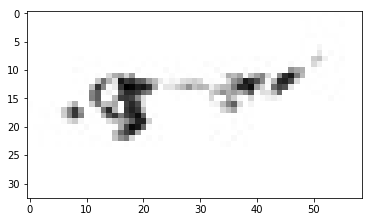

In [10]:
# show a random image from the train set
show_image(train_labels.sample(n=1).iloc[0]['image'])